In [70]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import numpy as np

from sklearn import cluster
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from training import x_train, y

In [41]:
cmap = {
    "fist": "blue",
    "down": "black",
    "up": "grey",
    "right": "red",
    "horizontal": "green",
    "left": "brown",
    "vertical": "orange",
}


def demo_plot(X, Y):
    plt.figure(figsize=(8, 6), dpi=80)
    for x1, x2, c in zip(X[:, 0], X[:, 1], Y):
        plt.scatter(x1, x2, c=cmap[c], label=c, alpha=0.3)

    plt.legend(
        handles=[
            mpatches.Patch(color=color, label=gest) for gest, color in cmap.items()
        ]
    )
    plt.grid()
    plt.show()

In [27]:
tsne = TSNE()
x_tsne = tsne.fit_transform(x_train)

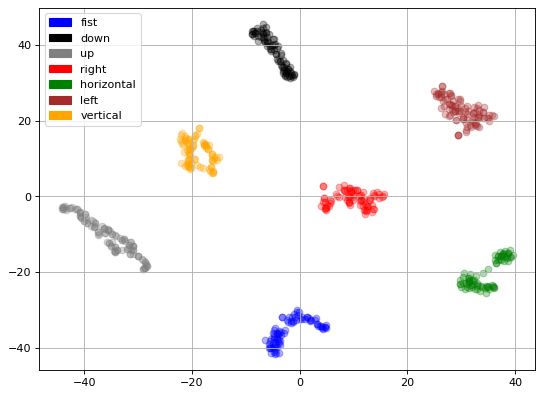

In [42]:
demo_plot(x_tsne, y)

In [43]:
pca = PCA()
x_pca = pca.fit_transform(x_train)

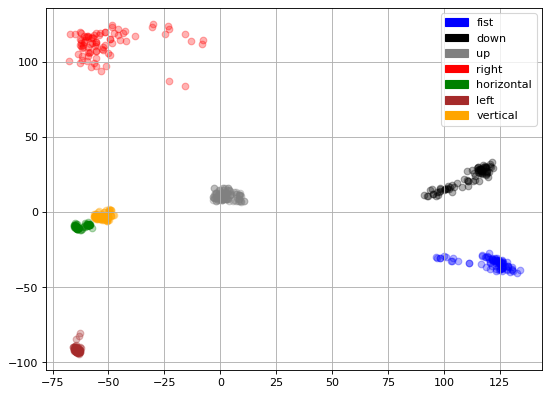

In [44]:
demo_plot(x_pca, y)

In [106]:
n_clusters = len(cmap)
colors = np.array([x for x in "bgrcmykbgrcmykbgrcmykbgrcmyk"])
colors = np.hstack([colors] * 20)


def clustering_demo(algo, X):
    plt.figure(figsize=(8, 6), dpi=80)

    algo.fit(X)
    if hasattr(algo, "labels_"):
        y_pred = algo.labels_.astype(np.int)
    else:
        y_pred = algo.predict(X)

    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)
    plt.grid()

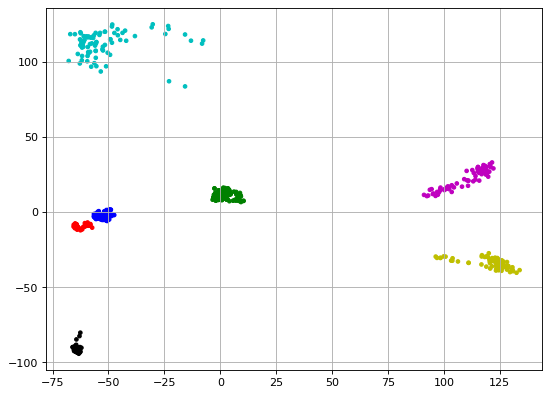

In [116]:
means = cluster.MiniBatchKMeans(n_clusters=n_clusters)
clustering_demo(means, x_pca)

/usr/local/Caskroom/miniconda/base/envs/grow/lib/python3.7/site-packages/sklearn/cluster/_spectral.py:484: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/usr/local/Caskroom/miniconda/base/envs/grow/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


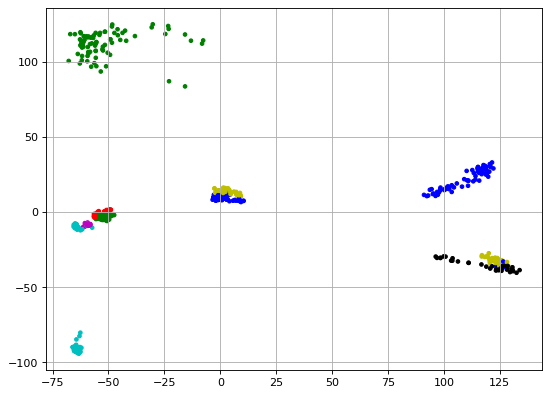

In [108]:
spectral = cluster.SpectralClustering(
    n_clusters=n_clusters, eigen_solver="arpack", affinity="nearest_neighbors"
)
clustering_demo(spectral, x_pca)

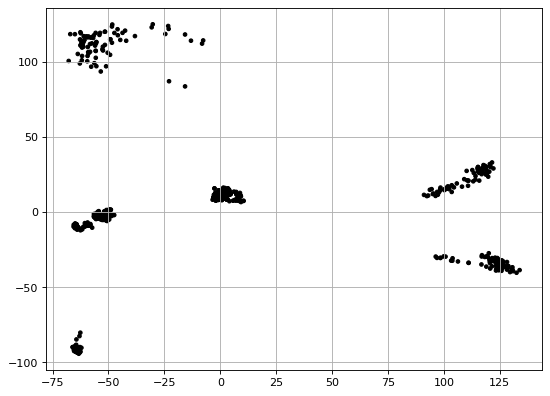

In [109]:
dbscan = cluster.DBSCAN(eps=0.2)
clustering_demo(dbscan, x_pca)

/usr/local/Caskroom/miniconda/base/envs/grow/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)


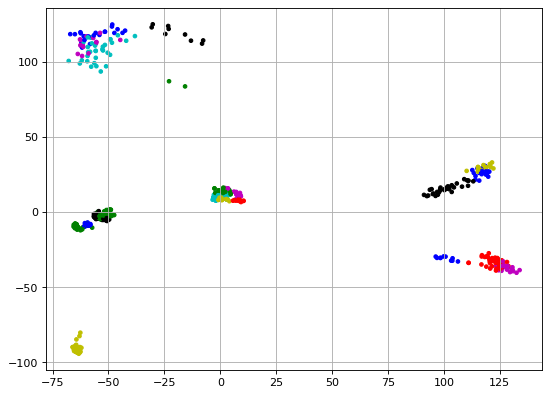

In [110]:
affinity_propagation = cluster.AffinityPropagation()
clustering_demo(affinity_propagation, x_pca)